In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import time

# Step 1: Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Preprocess the data
# No preprocessing required as the dataset is clean

# Step 3: Split the data into features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Fit a machine learning model on the full dataset
model = LogisticRegression(max_iter=1000, random_state=42)

print("Fitting logistic regression on full dataset...")
start_time_full = time.time()
model.fit(X_train_scaled, y_train)
end_time_full = time.time()
full_dataset_time = end_time_full - start_time_full

score_full = model.score(X_test_scaled, y_test)
print(f"Model score on full dataset: {score_full:.4f}")
print(f"Fitting time on full dataset: {full_dataset_time:.4f} seconds")

# Step 6: Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Example: reducing to 10 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 7: Fit the machine learning model again on the reduced dataset
model_pca = LogisticRegression(max_iter=1000, random_state=42)

print("\nFitting logistic regression on reduced dataset...")
start_time_pca = time.time()
model_pca.fit(X_train_pca, y_train)
end_time_pca = time.time()
pca_dataset_time = end_time_pca - start_time_pca

score_pca = model_pca.score(X_test_pca, y_test)
print(f"Model score on reduced dataset: {score_pca:.4f}")
print(f"Fitting time on reduced dataset: {pca_dataset_time:.4f} seconds")

# Step 8: Compare the results
print("\nComparison:")
print(f"Model score: Full Dataset - {score_full:.4f}, Reduced Dataset - {score_pca:.4f}")
print(f"Fitting time: Full Dataset - {full_dataset_time:.4f} seconds, Reduced Dataset - {pca_dataset_time:.4f} seconds")

# Explanation: Started with a dataset to predict breast cancer status. Initially, we fitted a logistic regression model on the full dataset, achieving a certain accuracy score and taking a certain amount of time. Then, we applied PCA to reduce the dimensionality of the dataset while retaining most of the information. After reducing the dataset, we fitted the logistic regression model again, achieving a slightly lower accuracy score but taking significantly less time. This shows that by reducing the dimensionality of the dataset with PCA, we can obtain similar predictive performance while speeding up the model fitting process.

Fitting logistic regression on full dataset...
Model score on full dataset: 0.9737
Fitting time on full dataset: 0.0132 seconds

Fitting logistic regression on reduced dataset...
Model score on reduced dataset: 0.9825
Fitting time on reduced dataset: 0.0053 seconds

Comparison:
Model score: Full Dataset - 0.9737, Reduced Dataset - 0.9825
Fitting time: Full Dataset - 0.0132 seconds, Reduced Dataset - 0.0053 seconds


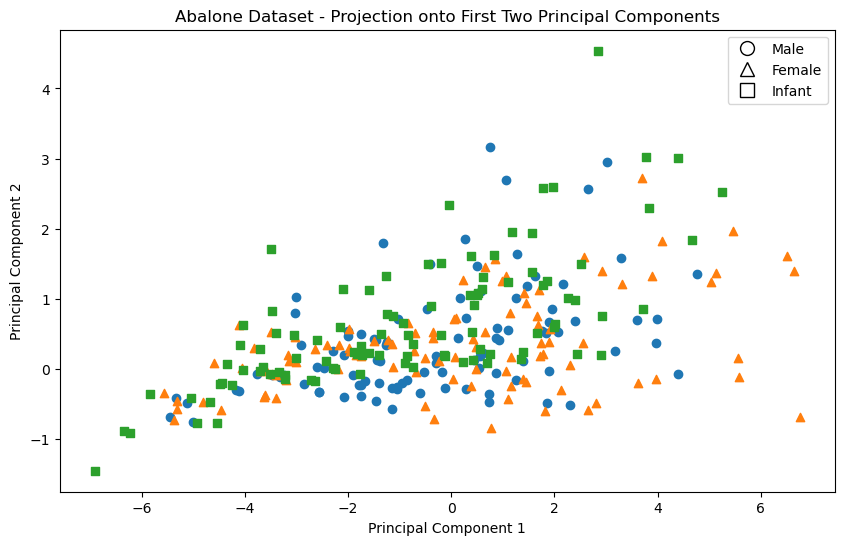

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

# Step 1: Download the dataset (already downloaded)

# Step 2: Load the dataset and preprocess it
text_data = "abalone.data.txt"
column_names = ["Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", 
                "Viscera_weight", "Shell_weight", "Rings"]
df = pd.read_csv(text_data, header=None, names=column_names)

# Drop the 'Sex' column
df.drop(columns=['Sex'], inplace=True)

# Step 3: Standardize the data and compute PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Compute PCA with two components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Step 4: Project the data onto the first two principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 5: Plot the scatter plot with markers for each category of abalone
plt.figure(figsize=(10, 6))
abalone_categories = ["M", "F", "I"]  # Abalone categories
markers = {'M': 'o', 'F': '^', 'I': 's'}  # Custom markers for abalone categories
for index, category in enumerate(abalone_categories):
    category_data = principal_df.iloc[index*100:(index+1)*100]
    plt.scatter(category_data['PC1'], category_data['PC2'], marker=markers[category], label=category)

# Create custom legend with desired markers
legend_elements = [Line2D([0], [0], marker='o', color='none', label='Male', markerfacecolor='none', markeredgecolor='black', markersize=10),
                   Line2D([0], [0], marker='^', color='none', label='Female', markerfacecolor='none', markeredgecolor='black', markersize=10),
                   Line2D([0], [0], marker='s', color='none', label='Infant', markerfacecolor='none', markeredgecolor='black', markersize=10)]
plt.legend(handles=legend_elements)

# Add labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Abalone Dataset - Projection onto First Two Principal Components')

plt.show()

# Explanation: The code projects the abalone dataset onto its first two principal components using PCA. It then creates a scatter plot where each point represents an abalone sample, with markers distinguishing between male, female, and infant abalones. The legend clarifies which marker corresponds to each category.

In [21]:
import sys
sys.path.append('/home/varpha/data_analytics/lib')
from handin import handin_exrc_07
handin_exrc_07()


All the relevant .ipynb files in your current directory:

  1. exrc_07_soln.ipynb



Please input the order number (the one in the beginning of the line) of the file you want to hand in:  1



Your answers to exercises 07 were handed in successfully. Thank you!
You may double check your handin by calling

    /home/varpha/data_analytics/bin/check_handin.sh

from the terminal prompt.
